In [18]:
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


In [9]:
meine_daten = pd.read_csv("annotated_data/cleaned_annotated_data_training_800.txt", names=["ID", "Date", "Time", "Comment Level", "Username", "Opinion", "Sentiment", "topic_comment", "Topic_article", "comment"], delimiter="\t")



In [10]:
Nan = meine_daten[meine_daten["comment"].isnull()]
Nan.loc[:, "comment"] = Nan.loc[:, "Topic_article"]
Nan.loc[:, "Topic_article"] = "NaN"


D:\Program Files (x86)\Miniconda3\envs\Masterarbeit\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
D:\Program Files (x86)\Miniconda3\envs\Masterarbeit\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


                                       ID        Date   Time  Comment Level  \
407  dc560e1e-1b01-4bca-aac5-d1b5b3bf0e45  2021-02-13  16:46            0.0   
569  c449c319-bd29-47f8-87fb-9ec76d99c967  2021-03-15  15:11            0.0   
624  ad7ef84e-7733-46d8-8960-f09096480a50  2020-12-12  15:34            0.0   

             Username  Opinion Sentiment topic_comment Topic_article  \
407  Markus-vvb8EOEWg  neutral   neutral         tests     überblick   
569  Markus-vvb8EOEWg  neutral   neutral       impfung       impfung   
624  Markus-vvb8EOEWg  neutral   neutral      lockdown     überblick   

                                               comment  
407  Ich frage mich wie diese Schnelltests geprüft ...  
569  Es gibt zwei Möglichkeiten. Erstens, die Aussa...  
624  Ein »kompletter Lockdown« muss auch Gottesdien...  
defaultdict(<class 'list'>, {'knielang': ['neutral', 'negative', 'negative', 'neutral', 'negative']})
defaultdict(<class 'list'>, {'knielang': ['neutral', 'negative',

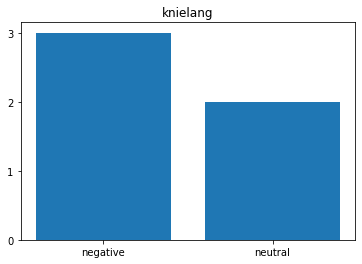

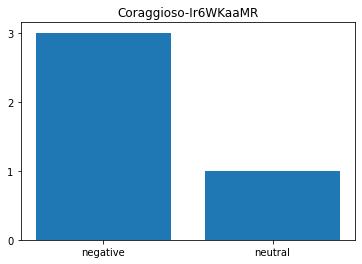

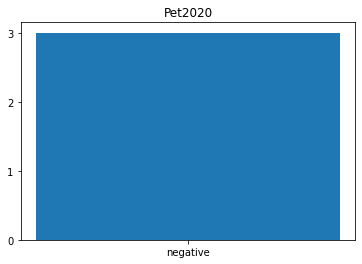

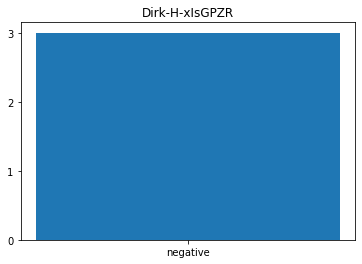

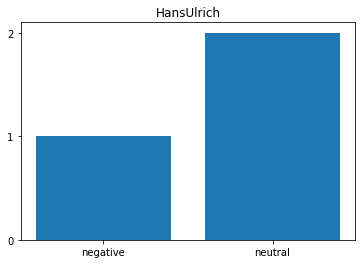

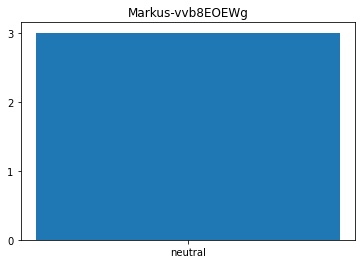

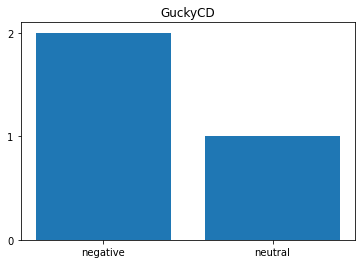

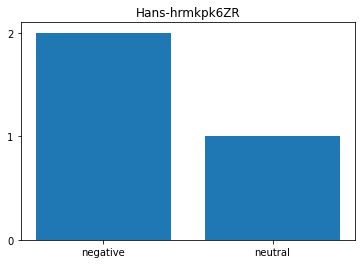

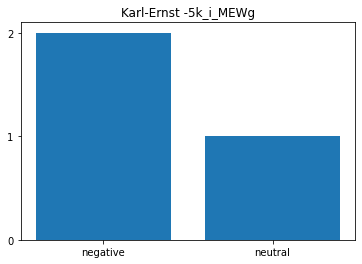

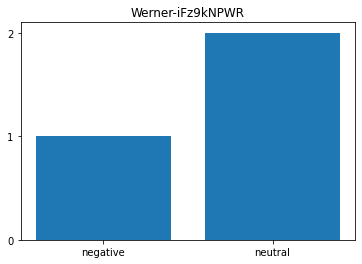

In [12]:



# stores username and the corresponding sentiment
sentiment_person = defaultdict(list)


meine_daten.update(Nan)
pd.set_option("display.max_rows", None)
# print(meine_daten.Username.value_counts())
print(meine_daten.loc[meine_daten.Username == "Markus-vvb8EOEWg"])
sentiment_verteilung = list(meine_daten.Sentiment.value_counts())
opinion_verteilung = list(meine_daten.Opinion.value_counts())

for username in meine_daten.Username.value_counts().index[:10]:
    liste = list(meine_daten.loc[meine_daten.Username == username]["Sentiment"])
    sentiment_person[username] = liste
    print(sentiment_person)

for key, value in sentiment_person.items():
    print(key, value)
    sentiment_person[key] = dict((l, value.count(l)) for l in set(value))


print(sentiment_person.keys())

for user in sentiment_person:
    ax = plt.figure().gca()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    names = list(sentiment_person[user].keys()) 
    values = list(sentiment_person[user].values())
    plt.title(user)
    plt.bar(range(len(sentiment_person[user])), values, tick_label = names)
    plt.show()

In [31]:
print(*sentiment_person)

knielang Coraggioso-Ir6WKaaMR Pet2020 Dirk-H-xIsGPZR HansUlrich Markus-vvb8EOEWg GuckyCD Hans-hrmkpk6ZR Karl-Ernst -5k_i_MEWg Werner-iFz9kNPWR


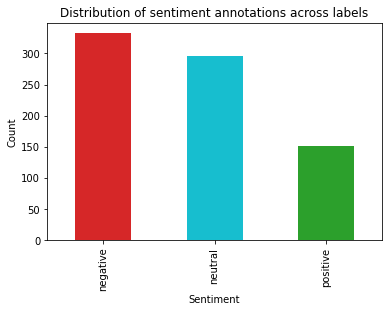

In [14]:
import matplotlib.pyplot as plt
sentiment = ["negative", "neutral", "positive"]


s = pd.Series(
    opinion_verteilung,
    index = sentiment
)


plt.title("Distribution of sentiment annotations across labels")
plt.ylabel('Count')
plt.xlabel('Sentiment')


ax = plt.gca()

my_colors = ["tab:red", "tab:cyan","tab:green"]

s.plot(kind="bar",
       color=my_colors)

plt.show()


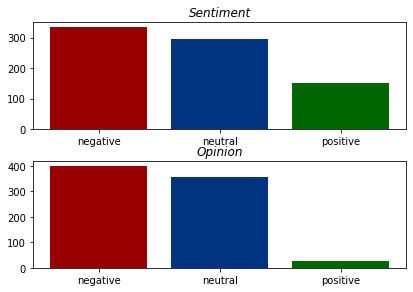

In [15]:
fig, (ax1, ax2) = plt.subplots(2)

fig.tight_layout()

ax1.bar(sentiment, opinion_verteilung, color= ["#990000", "#003380","#006600"])

ax2.bar(sentiment, sentiment_verteilung, color= ["#990000", "#003380","#006600"])

ax1.set_title("Sentiment", fontstyle="italic")
ax2.set_title("Opinion", fontstyle="italic")

plt.savefig("Distribution_Sentiment_Opinion")

In [29]:
print(opinion_verteilung[0] / sum(opinion_verteilung))

print(opinion_verteilung[1] / sum(opinion_verteilung))

print(opinion_verteilung[2] / sum(opinion_verteilung))

print(opinion_verteilung[2])


0.4
0.396
0.204
102


In [ ]:
import numpy as np

meine_daten.loc[(meine_daten.Opinion == "positive") & (meine_daten.Sentiment == "negative")]

# meine_daten.Sentiment.value_counts()

# meine_daten.loc[(meine_daten.Sentiment == "positive")]

In [3]:
import sklearn.metrics as metrics

### Cohens Kappa

Formula as follows:

$z = \frac{p_o-p_e}{1-p_e}$

Cohen's kappa coefficient (κ) is a statistic that is used to measure inter-rater reliability (...)

https://en.wikipedia.org/wiki/Cohen%27s_kappa

In [4]:
sven_opinion = []
vali_opinion = []

sven_sentiment = []
vali_sentiment = []

# Here we are reading in the data for cohens kappa
 
with open ("annotated_data/svens_agreement.txt") as sven:
    for line in sven:
        sven_opinion.append(line.split("\t")[5])
        sven_sentiment.append(line.split("\t")[6])
with open ("annotated_data/vali_agreement.txt") as vali:
    for line in vali:
        vali_opinion.append(line.split("\t")[5])
        vali_sentiment.append(line.split("\t")[6])

print(sven_sentiment)
print(vali_sentiment)

# We use sklearn method for this 

print(metrics.cohen_kappa_score(sven_opinion, vali_opinion))
metrics.cohen_kappa_score(sven_sentiment, vali_sentiment)


['negative', 'neutral', 'neutral', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'neutral', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'neutral', 'neutral', 'neutral', 'neutral', 'negative', 'negative', 'negative', 'negative', 'neutral', 'negative', 'negative', 'neutral', 'negative', 'negative', 'neutral', 'negative', 'negative', 'negative', 'neutral', 'positive', 'negative', 'neutral', 'negative', 'neutral', 'negative', 'negative', 'neutral', 'negative', 'neutral', 'neutral', 'negative', 'negative', 'neutral', 'negative', 'negative', 'negative', 'neutral', 'neutral', 'negative', 'neutral', 'negative', 'neutral', 'negative', 'neutral']
['negative', 'neutral', 'neutral', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'neutral', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'neutral', 'negative', 'neutral', 'negative', 'negative', 'negative', 'negative', 'neutral', 'negat

0.6277145811789038

Reported values for Cohen's Kappa are **0.4782608695652174** and **0.6277145811789038** for Opinion and Sentiment Agreement Respectively.
<br>
<br>
These scores correspond to a specific Strength of Agreement

|Cohen's Kappa statistic   |Strength of Agreement
|---|---|
| 0.00  | Poor  |
|   0.00 - 0.20 | Slight  |
| 0.21 - 0.40  | Fair  |
| 0.41 - 0.60  | Moderate  |
| 0.61 - 0.80  | Substantial  |
| 0.81 - 1.00  | Almost Perfect  |

https://pubmed.ncbi.nlm.nih.gov/15883903/

The scores show **Moderate** and **Substantial** Agreement for Opinion and Sentiment respectivly. 
<br>
Even if these values show that the two annotators agreed in the majority of the cases, the task of annotating sentiment and opinion for a comment at hand was expected to be trivial, expecting higher values for kappa values in both cases.
<br>
By looking at the data, it is assumed that especially the neutral class was most diffcult to annotate and contributed the most to a decrease in score. This is why the following approach will count neutral classes from any annotator as agreeing labels in order to evaluate the difficulty of the neutral class

In [14]:
def kappa_o_neutral(agreements_1, agreements_2):
    """
    this function will return Cohen's Kappa without neutral classes
    :param agreements_1: list of strings
    :param agreements_2: list of strings
    :return: float
    """

    correct_correct = 0
    false_false = 0
    correct_false = 0
    false_correct = 0

    for idx, label in enumerate(agreements_1):

        # all cases where we have a "POS-POS-case"
        # Includes NEUTRAL NEUTRAL, POS POS, POS NEUTRAL, NEUTRAL POS
        if (label == agreements_2[idx] == "positive") or (label == agreements_2[idx] == "neutral") or ((label == "neutral") and (agreements_2[idx] == "positive")) or ((label == "positive") and (agreements_2[idx] == "neutral")):
            correct_correct += 1
        
        # all cases with "POS-NEG-case"
        elif ((label == "positive") and (agreements_2[idx] == "negative")):
            correct_false += 1

        # all cases with "NEG-POS-case"
        elif ((label == "negative") and (agreements_2[idx] == "positive")):
            false_correct += 1

        else:
            false_false += 1

    p_nought = (correct_correct + false_false) / (false_correct + correct_false + correct_correct + false_false)

    p_correct = (correct_correct + correct_false) / (correct_correct + correct_false + false_correct + false_false) * ((correct_correct + false_correct) / (correct_correct + correct_false + false_correct + false_false))

    p_incorrect = (false_correct + false_false) / (correct_correct + correct_false + false_correct + false_false) * ((correct_false + false_false) / (correct_correct + correct_false + false_correct + false_false))

    p_expected = p_correct + p_incorrect

    kappa = (p_nought - p_expected) / (1 - p_expected)

    print(p_nought, p_incorrect, p_correct)

    return kappa

kappa_o_neutral(vali_sentiment, sven_sentiment)

21 39 0 0
1.0 0.42250000000000004 0.12249999999999998


1.0

### Analysing specific users

We have seen that some users that have commented multiple times in the randomly sampled data show some consistency when it comes to the opinion and sentiment. The goal now is to annotate more comments from these users in order to get a broader overview and see if this consistency still holds true.



In [17]:
from bs4 import BeautifulSoup
import requests

In [22]:
class UserCommentProfiling:
    """
    A class for profiling specific users 


    Attributes
    ----------

    user: str
        The username of the user to profile

    
    Methods
    ---------
    get_title_and_subtitle()
        returns the title and subtitle

    """
    def __init__(self, url, user):

        """
        Parameters
        ----------
        user : str
            The username of the user to profile
        """

        self.user = user
    

    def get_user(self):
        """
        this method will return the username

        Returns
        ----------
        string
            The username.
        """
        return self.user
    def get_title_and_subtitle(self):
        """
        this method will return the title and subtitle of a given URL

        Returns
        ----------
        tuple
            a tuple of two strings the title and subtitle
        """

        request = requests.get("https://www.spiegel.de/wissenschaft/medizin/corona-news-am-samstag-die-wichtigsten-entwicklungen-zu-sars-cov-2-und-covid-19-a-" + self.url)

        soup = BeautifulSoup(request.content, "html.parser")

        title = soup.find("title").text

        subtitle = soup.find("meta", property="og:description")["content"]

        return title, subtitle

    
# Here I check how far I have already annotated in ordere to not include comments twice

with open ("annotated_data/annotated_data_training.txt", mode="r", encoding="utf-8") as f:
    lines = [line for line in f.readlines() if line != "\n"]
    done_line = len(lines)

meine_daten = pd.read_csv("shuffled_corona_relevante_kommentare.txt", names=["ID", "Date", "Time", "Comment Level", "Username","comment"], delimiter="\t")

frequent_users = ['knielang', 'Coraggioso-Ir6WKaaMR', 'Pet2020', 'Dirk-H-xIsGPZR', 'HansUlrich', 'Markus-vvb8EOEWg', 'GuckyCD', 'Hans-hrmkpk6ZR', 'Karl-Ernst -5k_i_MEWg', 'Werner-iFz9kNPWR']

meine_daten = meine_daten[done_line:]

meine_daten.loc[meine_daten.Username == "Pet2020"]

,ID,Date,Time,Comment Level,Username,comment
1596,529f745f-c1a5-47ad-8be5-7121e770bf66,2021-05-01,22:55,0,Pet2020,Die Deutschen (Foristen) sind schon ein komisc...
1798,026242f6-62da-419b-b9a0-bc472d4c8fcf,2021-02-20,11:38,0,Pet2020,Warum plappern da die allermeisten? Habt Ihr ...
3369,8df92bcd-9177-4a56-81c6-7e2951465aac,2020-05-10,11:25,0,Pet2020,An den Schulen der Kinder haben wir immer und...
3384,2117f885-33e6-4965-ad69-b6d542134cbc,2020-11-05,19:27,0,Pet2020,"Ist eigentlich dem normalen Foristen bewusst, ..."
3844,4555ad3b-b08b-478b-bdd5-db0cbbdfd31d,2021-03-18,11:58,0,Pet2020,"Als in den USA die ersten Wahlautomaten kamen,..."
...,...,...,...,...,...,...
404649,f1f0f3a0-e112-49d1-9b18-5c9900583c62,2020-12-10,16:15,0,Pet2020,"16 Ministerpräsidenten treten zum Rednerpult, ..."
404936,0bb662ae-e79f-4215-aa04-21e9240a2806,2021-05-17,11:38,0,Pet2020,Und für die Paniker: Schaut ins Ausland Lernt ...
405118,92f10e72-885c-43bb-b66e-b3a479776fce,2021-05-02,09:08,0,Pet2020,Weil hier immer so gerne von den Verharmlosern...
405381,c441c336-5120-47cb-9f1a-3968f643e255,2020-10-15,19:59,0,Pet2020,Lockdown: Der Staat verordnet Stillstand Dageg...


In [23]:
meinUser = UserCommentProfiling("529f745f-c1a5-47ad-8be5-7121e770bf66")

meinUser.get_title_and_subtitle()

('Corona-News am Samstag: Rund jeder 1000. Bundesbürger an oder mit Corona gestorben - DER SPIEGEL',
 'In der Union wird eine Schließung der Impfzentren schon in wenigen Wochen diskutiert. Außerdem: Rund jeder 1000. Bundesbürger ist an oder mit Corona gestorben. Der Überblick.')

Corona-News am Samstag: Rund jeder 1000. Bundesbürger an oder mit Corona gestorben - DER SPIEGEL
In der Union wird eine Schließung der Impfzentren schon in wenigen Wochen diskutiert. Außerdem: Rund jeder 1000. Bundesbürger ist an oder mit Corona gestorben. Der Überblick.
